## Librerias

In [2]:
import pandas as pd
import numpy as np
import re # expresiones regulares (regex)
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import TreebankWordTokenizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MaxAbsScaler

# Preprocesamiento

* Eliminamos stopwords
* lematizamos
* Normalizamos el texto (quitamos mayúsculas y signos de puntuación)
* Vectorizamos y hacemos n-gramas
* Usamos SVD para ver cuantos topicos pueden tener los documentos

In [29]:
# Leer archivo .csv 
df = pd.read_csv('mañaneras.csv')

textoPrueba = df[['description']].copy() # Pongo .copy() porque cuando intentas 
                                  # quitar las stopwords sale un warning.
# textoPrueba = textoPrueba.head(1000)

print(textoPrueba.shape[0])
textoPrueba.head(10)

217


,description
0,Conferencia de prensa en vivo desde Palacio Na...
1,Conferencia de prensa en vivo desde Palacio Na...
2,Conferencia de prensa en vivo desde Palacio Na...
3,Conferencia de prensa en vivo desde Palacio Na...
4,"Conferencia de prensa matutina, desde Palacio ..."
5,"Conferencia de prensa matutina, desde Palacio ..."
6,"Conferencia de prensa matutina, desde Palacio ..."
7,"Conferencia de prensa matutina, desde Veracruz..."
8,"Conferencia de prensa matutina, desde Palacio ..."
9,"Conferencia de prensa matutina, desde Palacio ..."


Eliminamos stopwords

In [4]:
# Función para eliminar stopwords en español

def noStopwords(text):
    
    sw_es = set(stopwords.words('spanish'))

    text = ' '.join([word for word in text.split() if word.lower() not in sw_es])
    
    return text


In [5]:
textoPrueba['description'] = textoPrueba['description'].apply(noStopwords)
textoPrueba.head()

,description
0,Conferencia prensa vivo Palacio Nacional. Vier...
1,Conferencia prensa vivo Palacio Nacional. Juev...
2,Conferencia prensa vivo Palacio Nacional. Lune...
3,Conferencia prensa vivo Palacio Nacional. Lune...
4,"Conferencia prensa matutina, Palacio Nacional...."


Aplicamos lematización

In [6]:
# Función para lematizar al texto
def lemmatize_text(text):

    # Cargamos el módulo de español
    nlp = spacy.load("es_core_news_sm")

    # nlp crea una pipeline que le adhiere metadata que la paquetería spacy usa
    doc = nlp(text)

    lemmatized_text = " ".join([token.lemma_ for token in doc])
    
    return lemmatized_text

In [7]:
textoPrueba['description'] = textoPrueba['description'].apply(lemmatize_text)
textoPrueba.head()

,description
0,Conferencia prensa vivo Palacio Nacional . Vie...
1,Conferencia prensa vivo Palacio Nacional . jue...
2,Conferencia prensa vivo Palacio Nacional . lun...
3,Conferencia prensa vivo Palacio Nacional . lun...
4,"Conferencia prensa matutino , Palacio Nacional..."


Normalizamos el texto, quitamos mayúsculas y signos de puntuación

In [8]:
# Función para normalizar el texto

def noPuntuacion(text):

    text = text.lower()

    text = re.sub('[áäàâ]', 'a', text)
    text = re.sub('[éëèê]', 'e', text)
    text = re.sub('[íïìî]', 'i', text)
    text = re.sub('[óöòô]', 'o', text)
    text = re.sub('[úüùû]', 'u', text)

    return re.findall(r'[a-zñ]+', text)

In [9]:
textoPrueba['description'] = textoPrueba['description'].apply(noPuntuacion).apply(lambda x: " ".join(x))
textoPrueba.head()

,description
0,conferencia prensa vivo palacio nacional viern...
1,conferencia prensa vivo palacio nacional jueve...
2,conferencia prensa vivo palacio nacional lunes...
3,conferencia prensa vivo palacio nacional lunes...
4,conferencia prensa matutino palacio nacional l...


Aplicamos stemming (Optamos por no ponerla)

In [10]:
# # Función para aplicar stemming al texto

# def stemmiar(text):

#     stemmer = SnowballStemmer('spanish')

#     return ' '.join([stemmer.stem(word) for word in text.split()])

In [11]:
# textoPrueba['text'] = textoPrueba['text'].apply(stemmiar)
# textoPrueba.head()

Vectorizamos y hacemos n-gramas

In [10]:
# Creamos una instancia que hará la vectorización TF-IDF
vect = TfidfVectorizer()

# Tokenizamos como Penn Treebank
tokenizer = TreebankWordTokenizer()
vect.set_params(tokenizer=tokenizer.tokenize)

# Incluimos 1-grams y 2-grams
vect.set_params(ngram_range=(1, 2))

# Ignoramos términos que aparecen en más del 70% de los documentos
vect.set_params(max_df=0.7)

# Solo mantenemos los términos que aparecen en al menos 2 documentos
vect.set_params(min_df=2)

TfidfVectorizer(max_df=0.7, min_df=2, ngram_range=(1, 2),
                tokenizer=<bound method TreebankWordTokenizer.tokenize of <nltk.tokenize.treebank.TreebankWordTokenizer object at 0x00000245173B9A90>>)

In [11]:
# Lo aplicamos
vectFit = vect.fit_transform(textoPrueba['description']) 
vectFit 

c:\Users\Victor Minjares\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


<217x26241 sparse matrix of type '<class 'numpy.float64'>'
	with 187691 stored elements in Compressed Sparse Row format>

In [12]:
print(vectFit[1])

  (0, 1162)	0.02902993414914131
  (0, 4906)	0.03628318955417566
  (0, 8384)	0.043209421557117204
  (0, 109)	0.043209421557117204
  (0, 7511)	0.043209421557117204
  (0, 1143)	0.025248220547780094
  (0, 23409)	0.043209421557117204
  (0, 16723)	0.043209421557117204
  (0, 4767)	0.039033680122300275
  (0, 6724)	0.04085776593511727
  (0, 5185)	0.043209421557117204
  (0, 21281)	0.043209421557117204
  (0, 8345)	0.043209421557117204
  (0, 319)	0.043209421557117204
  (0, 11443)	0.03628318955417566
  (0, 10973)	0.043209421557117204
  (0, 11405)	0.04085776593511727
  (0, 25923)	0.043209421557117204
  (0, 8131)	0.04085776593511727
  (0, 23969)	0.04085776593511727
  (0, 14198)	0.043209421557117204
  (0, 24344)	0.043209421557117204
  (0, 4728)	0.04085776593511727
  (0, 15376)	0.03519163787178304
  (0, 21577)	0.04085776593511727
  :	:
  (0, 21880)	0.03213646446993721
  (0, 18043)	0.017344767325551385
  (0, 19749)	0.0237063805368087
  (0, 5411)	0.022244673153701437
  (0, 13082)	0.02279151308379404
  (0

Descomposicion por valores singulares (SVD)

Hacemos z-score normalizacion

In [60]:
# Creamos la instancia 
scaler = StandardScaler(with_mean=False)
# Calculamos el promedio y la desviacion estandar
scaler.fit(vectFit)
# Re escalamos
vectFitScaled = scaler.transform(vectFit)

print(vectFitScaled[0])

  (0, 19423)	0.10658905009130362
  (0, 14631)	3.9939943020657798
  (0, 24392)	3.1910699910357403
  (0, 22464)	2.7890238595916075
  (0, 14637)	6.34577637642733
  (0, 1169)	0.1816929145499968
  (0, 7413)	0.20094800635307847
  (0, 25895)	0.9048887732220058
  (0, 10233)	4.009467628477107
  (0, 13955)	2.62885120271344
  (0, 20168)	2.3635023555244494
  (0, 10264)	1.5636189465323356
  (0, 14798)	3.9453606763696714
  (0, 7405)	3.6065072585187283
  (0, 15250)	0.7916639672476847
  (0, 5676)	0.8625395865531453
  (0, 14796)	2.858172949593013
  (0, 20482)	1.2502457370158517
  (0, 22225)	1.6105325688625907
  (0, 11129)	1.6105325688625907
  (0, 11370)	2.6428532004842675
  (0, 18917)	0.8519610985126911
  (0, 19652)	3.864891839554164
  (0, 1886)	1.924089840890334
  (0, 21861)	1.5008615267504553
  :	:
  (0, 14779)	1.7867282459533598
  (0, 13957)	1.3749761929493054
  (0, 14450)	1.0020352493112252
  (0, 20525)	0.6064457485227343
  (0, 14826)	2.8115085426517386
  (0, 19945)	0.856910993124063
  (0, 20883)	1

In [47]:
# vectFitScaled = vectFitScaled.transpose()
# vectFitScaled

<26241x217 sparse matrix of type '<class 'numpy.float64'>'
	with 187691 stored elements in Compressed Sparse Column format>

In [61]:
# Creamos instancia de la clase TruncatedSVD
dimReduction = TruncatedSVD(n_components = textoPrueba.shape[0], random_state = 2)

In [62]:
# Ajustamos la transfromacion con nuestros datos
dimReduction.fit(vectFitScaled)

TruncatedSVD(n_components=217, random_state=2)

In [63]:
# Reducimos la dimensionalidad
dataReduction = dimReduction.transform(vectFitScaled)

In [64]:
print("Variancia explicada por los 36,755 componentes = " \
        + str(sum(dimReduction.explained_variance_ratio_ * 100)))

Variancia explicada por los 36,755 componentes = 100.00000000000003


In [65]:
dimReduction.explained_variance_ratio_ * 100

array([0.13977068, 1.10428979, 0.89472461, 0.77305064, 0.71635826,
       0.68507958, 0.67300333, 0.66212923, 0.65703556, 0.65308872,
       0.64556059, 0.63682018, 0.63525626, 0.63121121, 0.62485309,
       0.61903162, 0.6166262 , 0.61448975, 0.60996028, 0.6090335 ,
       0.60657538, 0.60087981, 0.59687008, 0.5953861 , 0.59385978,
       0.59256453, 0.58902014, 0.58774021, 0.57878167, 0.5780603 ,
       0.5762358 , 0.57480605, 0.57414804, 0.56974727, 0.56716872,
       0.56385763, 0.56132931, 0.5594749 , 0.55725351, 0.55691354,
       0.55314586, 0.5522004 , 0.55087024, 0.54890443, 0.54682333,
       0.54295113, 0.5413581 , 0.54076922, 0.53912647, 0.53733738,
       0.53663786, 0.534837  , 0.53142649, 0.53059198, 0.52924002,
       0.5271787 , 0.52697387, 0.52367861, 0.5222004 , 0.52013004,
       0.5177419 , 0.51749416, 0.51698604, 0.51412316, 0.51296025,
       0.51148682, 0.50982854, 0.50792936, 0.50633282, 0.50451081,
       0.5035376 , 0.50331021, 0.50130085, 0.49948689, 0.49713

In [20]:
np.cumsum(dimReduction.explained_variance_ratio_ * 100)

array([  0.13977068,   1.24406047,   2.13878508,   2.91183573,
         3.62819399,   4.31327357,   4.9862769 ,   5.64840613,
         6.30544168,   6.95853041,   7.60409099,   8.24091117,
         8.87616743,   9.50737864,  10.13223173,  10.75126334,
        11.36788954,  11.9823793 ,  12.59233958,  13.20137308,
        13.80794846,  14.40882827,  15.00569835,  15.60108445,
        16.19494423,  16.78750876,  17.3765289 ,  17.96426911,
        18.54305079,  19.12111109,  19.69734688,  20.27215294,
        20.84630098,  21.41604825,  21.98321697,  22.5470746 ,
        23.10840391,  23.66787881,  24.22513232,  24.78204585,
        25.33519171,  25.88739212,  26.43826235,  26.98716678,
        27.53399011,  28.07694124,  28.61829934,  29.15906856,
        29.69819503,  30.23553241,  30.77217027,  31.30700727,
        31.83843376,  32.36902573,  32.89826575,  33.42544445,
        33.95241832,  34.47609693,  34.99829733,  35.51842737,
        36.03616928,  36.55366344,  37.07064948,  37.58

Text(0, 0.5, 'Variancia explicada (%)')

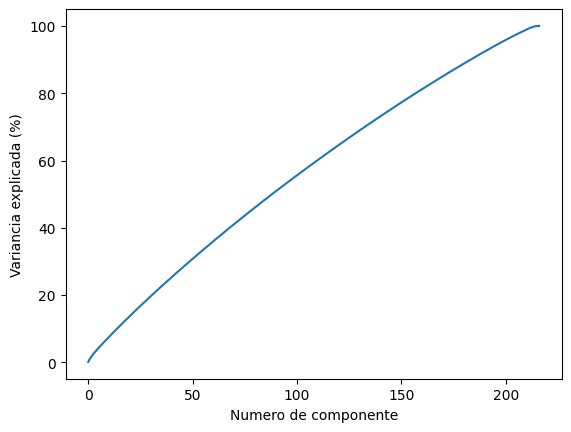

In [66]:
plt.plot(np.cumsum(dimReduction.explained_variance_ratio_ * 100))
plt.xlabel("Numero de componente")
plt.ylabel("Variancia explicada (%)")

In [67]:
# Creamos instancia de la clase TruncatedSVD
dimReduction2 = TruncatedSVD(n_components = 2, random_state = 2)

# Ajustamos la transfromacion con nuestros datos
dimReduction2.fit(vectFitScaled)

# Reducimos la dimensionalidad
dataReduction2 = dimReduction2.transform(vectFitScaled)

print("Variancia explicada por 2 componentes = " \
        + str(sum(dimReduction2.explained_variance_ratio_ * 100)))

Variancia explicada por 2 componentes = 1.2401515189078118


Text(0, 0.5, 'Segundo componente')

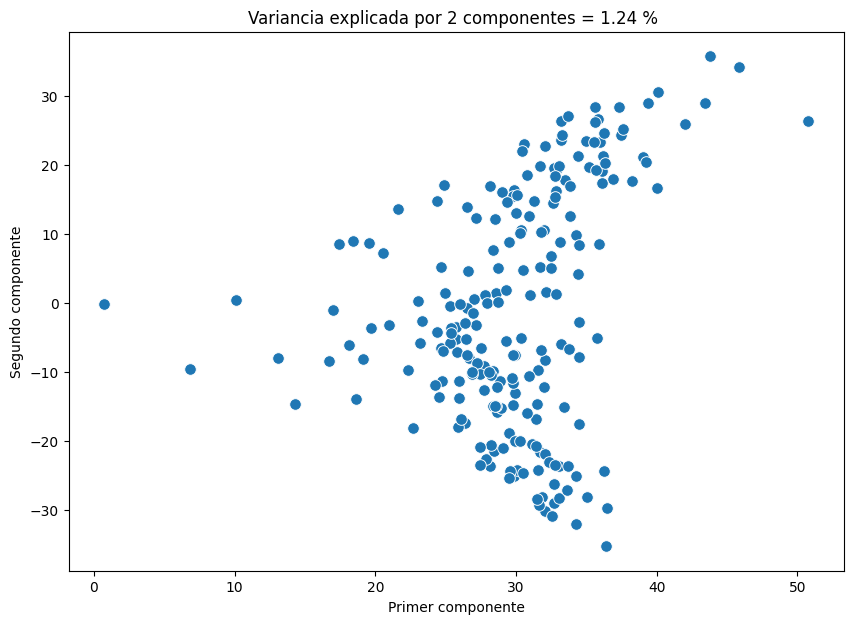

In [68]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=dataReduction2[:,0], y=dataReduction2[:,1], s=70)
plt.title(f"Variancia explicada por 2 componentes = {round(sum(dimReduction2.explained_variance_ratio_ * 100),3)} % ")
plt.xlabel("Primer componente")
plt.ylabel("Segundo componente")

Estandarizamos la matriz para meterla al LDA

In [24]:
scaler = MaxAbsScaler()
scaler.fit(vectFit)
vectFitStandardized = scaler.transform(vectFit)

In [25]:
print(vectFitStandardized[1])

  (0, 1162)	0.7257032911601133
  (0, 4906)	0.9639660328829345
  (0, 8384)	1.0
  (0, 109)	0.9509673042764306
  (0, 7511)	1.0
  (0, 1143)	0.5336872948137664
  (0, 23409)	1.0
  (0, 16723)	0.8839508809038084
  (0, 4767)	0.457044991474296
  (0, 6724)	0.9509673042764306
  (0, 5185)	1.0
  (0, 21281)	0.9586630066683984
  (0, 8345)	1.0
  (0, 319)	1.0
  (0, 11443)	0.9586630066683984
  (0, 10973)	1.0
  (0, 11405)	0.915684842033978
  (0, 25923)	1.0
  (0, 8131)	0.49358678257414174
  (0, 23969)	0.49358678257414174
  (0, 14198)	0.9871735651482837
  (0, 24344)	1.0
  (0, 4728)	0.9999999999999999
  (0, 15376)	0.799995305084235
  (0, 21577)	0.9543298165136803
  :	:
  (0, 21880)	0.684480756799551
  (0, 18043)	0.12818289687168716
  (0, 19749)	0.48124994330006676
  (0, 5411)	0.26652091424345564
  (0, 13082)	0.2792017439403079
  (0, 21229)	1.0
  (0, 5505)	0.31776598918151805
  (0, 22774)	0.13078034685309034
  (0, 6404)	0.7871211227290378
  (0, 20178)	0.3887000534472747
  (0, 5753)	0.23299069051916302
  (0, 8

Obtención de palabras clave usando TF-IDF

In [26]:
# Obtener el vocabulario de términos
feature_names = vect.get_feature_names_out()

# Obtener las frecuencias de términos en el primer documento
doc_freqs = vectFit[0].toarray()[0]

# Crear una lista de tuplas que contienen el término y su frecuencia en el primer documento
doc_term_freqs = [(feature_names[i], doc_freqs[i]) for i in range(len(feature_names))]

# Ordenar la lista de tuplas por la frecuencia descendente
doc_term_freqs_sorted = sorted(doc_term_freqs, key=lambda x: x[1], reverse=True)

# Obtener las 10 palabras clave más importantes para el primer documento
doc_keywords = [term for term, freq in doc_term_freqs_sorted[:10]]

print(doc_keywords)


['lopezobrador', 'telegram facebook', 'web telegram', 'lopezobrador instagram', 'twitter lopezobrador', 'combustible', 'ducto', 'robo combustible', 'audio', 'plan robo']


In [27]:
# Importar las bibliotecas necesarias
import gensim
from gensim import corpora
from gensim.models import LdaModel
import pandas as pd
from nltk.tokenize import TreebankWordTokenizer

In [69]:
# Tokenizar los documentos utilizando el tokenizador de Penn Treebank
tokenizer = TreebankWordTokenizer()
documentos = []
for documento in textoPrueba['description'].tolist():
    tokens = tokenizer.tokenize(documento)
    documentos.append(tokens)

# Crear un diccionario de términos a partir de los documentos
dictionary = corpora.Dictionary(documentos)

# Crear una representación de la bolsa de palabras de los documentos
corpus = [dictionary.doc2bow(documento) for documento in documentos]

# Entrenar un modelo LDA con 10 tópicos
model_lda = LdaModel(corpus=corpus, num_topics=10, id2word=dictionary)

# Imprimir los tópicos
for idx, topic in model_lda.print_topics(num_topics=10):
    print('Tópico: {} \nPalabras clave: {}\n'.format(idx+1, topic))


Tópico: 1 
Palabras clave: 0.088*"de" + 0.033*"," + 0.027*"la" + 0.024*"que" + 0.022*"y" + 0.020*"el" + 0.020*"a" + 0.020*":" + 0.018*"en" + 0.014*"del"

Tópico: 2 
Palabras clave: 0.056*"de" + 0.029*"la" + 0.026*"," + 0.023*"a" + 0.022*"que" + 0.020*"el" + 0.019*"y" + 0.017*"en" + 0.014*":" + 0.011*"los"

Tópico: 3 
Palabras clave: 0.078*"de" + 0.044*"la" + 0.030*"," + 0.026*":" + 0.024*"y" + 0.021*"que" + 0.021*"el" + 0.020*"a" + 0.017*"en" + 0.014*"del"

Tópico: 4 
Palabras clave: 0.072*"de" + 0.030*"la" + 0.027*"," + 0.026*"que" + 0.024*"el" + 0.023*"y" + 0.022*"a" + 0.015*":" + 0.015*"en" + 0.013*"los"

Tópico: 5 
Palabras clave: 0.066*"de" + 0.035*"," + 0.031*"la" + 0.022*"que" + 0.022*"el" + 0.019*"en" + 0.018*"a" + 0.018*":" + 0.014*"y" + 0.012*"del"

Tópico: 6 
Palabras clave: 0.060*"de" + 0.030*"la" + 0.022*"," + 0.019*"que" + 0.018*"en" + 0.018*":" + 0.015*"el" + 0.015*"del" + 0.014*"y" + 0.013*"a"

Tópico: 7 
Palabras clave: 0.064*"de" + 0.028*"," + 0.025*"la" + 0.022*"y" +